# Training Deep Neural-Network with Pytorch for Digit Recognition 

In this notebook we are going to learn how to build deep Neural-Network using Pytorch. We will be using MNIST data set to train a deep neural-net that can classify hand-written digits from images. More specifically our learning goal for this tutorial will be as following,

1. How to load an existing data set in Pytorch
2. How to use *torch.nn.sequential* to build a deep neural network
3. How to setup data for forward pass through the neural-net

Each of the above steps will be impllemented in different cells.

### Import necessary packages

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

### Load data set from Pytorch's repository

In [3]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Create an iterator to fetch data in batch (will be useful during training the network)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

### Get some information about the data
We will read $64$ images at a time, each of them are $28\times28$ size with $1$ grey channel. We will grab each batch of data as a $4$ dimensional tensor. We need to reshape this data later to feed in to the network.

In [4]:
dataiter = iter(trainloader)

# Get info of one batch of data
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


### We will build the following neural network
<img src="figures/mlp_mnist.png" width=600px>

### Build a simple feed-forward (no back propagation or optimization) neural-network.
Using *torch.nn.sequential* we will create the above neural-network. For now we will assume that the network has no learning capability, so no optimization / backpropagation has been implemented. We just fetch one batch of data, resize them and feed them into the network and compute the loss.

In [26]:
# Build a feed-forward network
model = torch.nn.Sequential(torch.nn.Linear(784, 128),
                      torch.nn.ReLU(),
                      torch.nn.Linear(128, 64),
                      torch.nn.ReLU(),
                      torch.nn.Linear(64, 10))

# Define the loss
criterion = torch.nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)
print("Shape of data after reshaping: ", images.shape)

# Forward pass, get our logits
logits = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

Shape of data after reshaping:  torch.Size([64, 784])
tensor(2.2951, grad_fn=<NllLossBackward>)


### Here we build the neural network, capable of learning
We represent the same network in morecompact and clean manner. Forther, we have added *Loss-Function* and *Optimizer*.

In [27]:
model = torch.nn.Sequential(torch.nn.Linear(784, 128),
                      torch.nn.ReLU(),
                      torch.nn.Linear(128, 64),
                      torch.nn.ReLU(),
                      torch.nn.Linear(64, 10),
                      torch.nn.LogSoftmax(dim=1))

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

### Train the network
We will train the network for $5$ epochs. If our implementation is correct, then loss should go down in each iteration.

In [28]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9340656069296
Training loss: 0.8633807133764092
Training loss: 0.5414085518767331
Training loss: 0.4465736996835229
Training loss: 0.39941977266309614


### Predict data
Now that we have a trained neural network, it is the time to check if our model can predict had-written digits. With the network trained, we can check out it's predictions. Remember, the output of the model provide us *logits* which is to be passed in through the *softmax* function to get probability. The definition of *logits* can be found below,

*Logits interpreted to be the unnormalised (or not-yet normalised) predictions (or outputs) of a model. These can give results, but we don't normally stop with logits, because interpreting their raw values is not easy.*

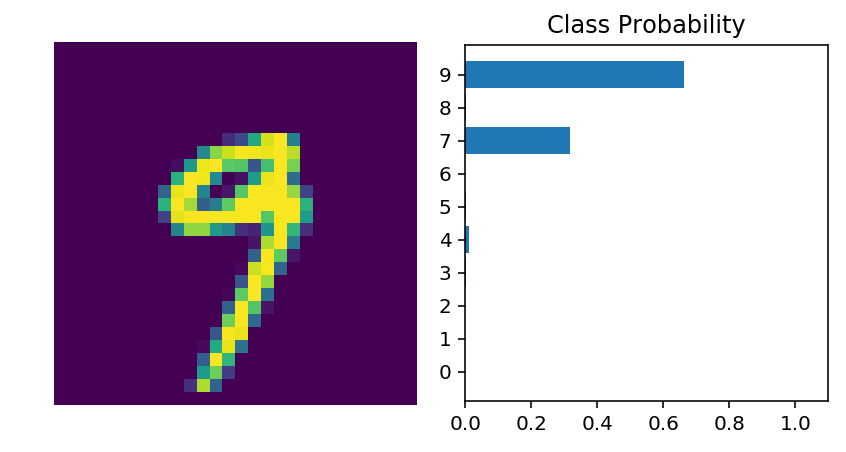

In [30]:
# Predit digits
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)